In [62]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as data
import sklearn
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score 
import seaborn as sns

In [27]:
pwd

'C:\\Users\\victory\\Downloads'

17999
(17999, 13)


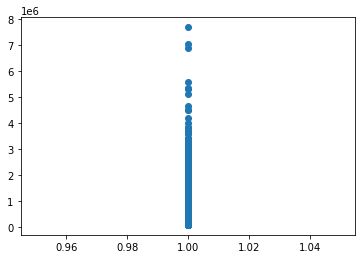

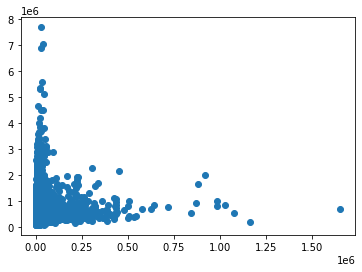

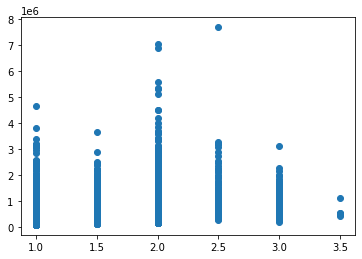

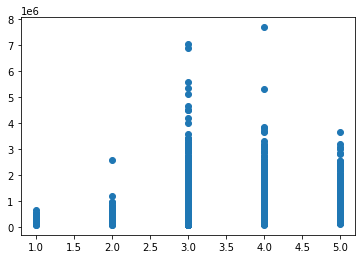

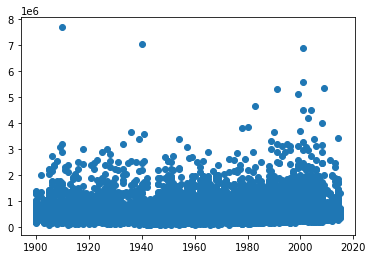

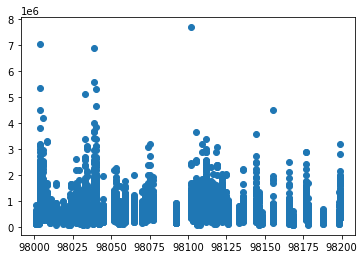

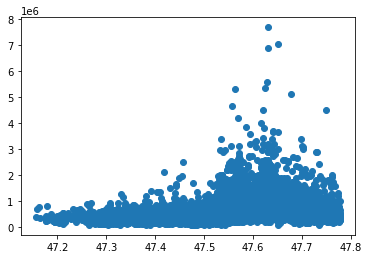

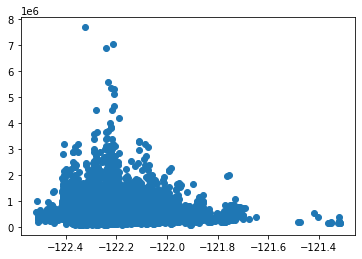

(17999, 13)


In [63]:
datasheet = data.read_excel(r"/users/victory/Downloads/Data/house_prices_data_training_data.xlsx", dtype=None)
Train = data.DataFrame(datasheet)
X = Train.copy()
cc = set() 
def correlation(ds, pointer):
    matrixofcorr = ds.corr()
    for i in range(len(matrixofcorr.columns)):
        for j in range(i):
            if matrixofcorr.iloc[i, j] >= pointer and (matrixofcorr.columns[j] not in cc):
                feature = matrixofcorr.columns[i] 
                cc.add(feature)
                if feature in ds.columns:
                    del ds[feature]
    return ds
X = data.DataFrame(correlation(X,0.5))              
X = data.DataFrame(X.drop('price',axis=1).values)
X = data.DataFrame(X.drop(0,axis=1).values)
X = data.DataFrame(X.drop(0,axis=1).values)

X = np.array(X, dtype=float)
y = Train["price"].values
m = y.size
X = np.insert(X,0,np.ones(m), axis=1)
rows,cols = X.shape
# index features that might benefit from a polynomial
featuresneeded = np.where(X.min(0) >= 1)[0]
featuresneeded= np.append(featuresneeded,np.where(X.max(0) < 0)[0])
print(y.size)
print(X.shape)
#scatter plot test to see how they look and choose 3
for i in range(featuresneeded.size):
    
    plt.figure()
    plt.scatter(x=X[:,featuresneeded[i]],y= y)           
    plt.show()
featuresneeded = np.delete(featuresneeded, 0)
featuresneeded = np.delete(featuresneeded, 2)
featuresneeded = np.delete(featuresneeded, 3)
print(X.shape)



In [64]:
def polynomial(X,degree):
    
    
    rows,cols = X.shape
        
    for i in range(Index.size):
        Pol = np.power(X[:,Index[i]],degree)
        X = np.column_stack([X,Pol])
    return X


In [65]:
   def computeCost(X, y, theta):
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    
    J = 0
    
    # ====================== YOUR CODE HERE =====================
    hnode = X@theta
    J = 1/(2* m)*(np.sum(np.square(hnode-y)))
    
    # ===========================================================
    return J

In [66]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        alphabym=alpha/m
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/m)*(np.dot(X.T,sumofh0x-y)))

        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [69]:
#using Kfold cross-validation
folds = KFold(n_splits = 5, random_state = 100, shuffle = True)
X1 = polynomial(X,2)
X2 = polynomial(X,3)
X3 = polynomial(X,4)
scaler = preprocessing.StandardScaler().fit(X1)
X1 = scaler.transform(X1)
X1 = (X1[:, ~np.isnan(X1).any(axis=0)])
X2 = (X2[:, ~np.isnan(X2).any(axis=0)])
X3 = (X3[:, ~np.isnan(X3).any(axis=0)])

for train_index, test_index in folds.split(X1, y):
        Xtrain, Xtest = X1[train_index], X1[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        theta = np.ones(X1.shape[1])
        theta1, J_history = gradientDescent(Xtrain,ytrain,theta,0.01,100)
        ypred = np.dot(Xtest,theta1)
        result = np.sqrt(mean_squared_error(ypred,ytest))
print(result)


583252.9636498116


In [70]:
#using StratifiedKFold cross-validation
folds = StratifiedKFold(n_splits = 10, random_state = 100, shuffle = True)
X1 = polynomial(X,2)
X2 = polynomial(X,3)
X3 = polynomial(X,4)
scaler = preprocessing.StandardScaler().fit(X1)
X1 = scaler.transform(X1)
X1 = (X1[:, ~np.isnan(X1).any(axis=0)])
X2 = (X2[:, ~np.isnan(X2).any(axis=0)])
X3 = (X3[:, ~np.isnan(X3).any(axis=0)])
scoresfold = np.empty(10)
result = np.empty(3)

for train_index, test_index in folds.split(X1, y):
        Xtrain, Xtest = X1[train_index], X1[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        theta = np.ones(X1.shape[1])
        theta1, J_history = gradientDescent(Xtrain,ytrain,theta,0.01,100)
        ypred = np.dot(Xtest,theta1)
        result = np.sqrt(mean_squared_error(ypred,ytest))
print(result)



C:\Users\victory\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


623782.339153431


In [73]:
def RegluarizationcomputeCost(X, y, theta,lambd):
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly

    Reg=0
    J = 0
    constReg = lambd/2*m
    n=theta.size
    # ====================== YOUR CODE HERE =====================
    hnode = X@theta
    J = 1/(2* m)*(np.sum(np.square(hnode-y)))
    
    for j in range(n):
        Reg = Reg + constReg*(theta[j]**2)
    J = J + Reg
    # ===========================================================
    return J

In [61]:

def RegradientDescentMulti(X, y, theta, alpha, num_iters,lambd):
# Initialize some useful values
    m = y.shape[0]  
    theta = theta.copy() 
    J_history = []
    theta0 = theta.copy()
    for i in range(num_iters):
        sumofh0x=np.dot(X,theta)
        theta0=theta0-((alpha/m)*(np.dot(X.T,(np.dot(X,theta0))-y)))
        theta = ((theta*(1-(alpha*lambd)/m))-((alpha/m)*(np.dot(X.T,sumofh0x-y))))
        theta[0] = theta0[0]
    J_history = RegluarizationcomputeCost(X, y, theta,lambd)
    return theta, J_history


In [78]:
lambdas = np.array([0,0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
Xt, X_valid, y_train, y_valid = train_test_split(X3, y, train_size=0.8, random_state=101)
#for a 60:20:20 split
Xt, X_test, y_train, y_test = train_test_split(Xt, y_train, train_size=0.75, random_state=101)
#print(Xt)
scaler = preprocessing.StandardScaler().fit(Xt)
Xt = scaler.transform(Xt)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)
alpha = 0.03
num_iters = 300
ValidationCost = np.zeros(lambdas.size)
thetaIn = np.zeros(Xt.shape[1])
for j in range(lambdas.size):
                     theta, J_history = RegradientDescentMulti(Xt, y_train, thetaIn, alpha, num_iters,lambdas[j])
                    theta[0] = theta0[0]
                    ValidationCost[j] = computeCost(X_valid,y_valid,theta)
BestLambda = np.argmin(ValidationCost)
for k in range(lambdas.size):
    
    Testing,TestingCost = RegradientDescentMulti(X_test, y_test, thetaIn, alpha, num_iters,lambdas[k])
    ValidationCost[k] = TestingCost


[1.81196385e+11 1.10281018e+12 2.02440956e+12 3.86756511e+12
 7.55370333e+12 1.49252883e+13 2.96656934e+13 5.91354494e+13
 1.18030792e+14 2.35645167e+14 4.70171634e+14 9.36438845e+14]


# New Section